# Part IV: Modeling

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Unpickling train/test files

In [2]:
# Unpickle finalized df_ohe
infile = open('df_ohe_final_2', 'rb')

df = pickle.load(infile)
infile.close()

In [3]:
df.shape

(957, 29)

## 2.1 Data split

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   House_type          957 non-null    object 
 1   Listing_price       957 non-null    int64  
 2   Sold_price          957 non-null    float64
 3   Bedroom             957 non-null    float64
 4   Washroom            957 non-null    int64  
 5   Parking             957 non-null    int64  
 6   Tax                 957 non-null    float64
 7   Maintenance         957 non-null    float64
 8   Size                957 non-null    float64
 9   Days_on_market      957 non-null    int64  
 10  Exposure            957 non-null    object 
 11  heat                957 non-null    int64  
 12  water               957 non-null    int64  
 13  hydro               957 non-null    int64  
 14  x0_Condo Apt        957 non-null    float64
 15  x0_Condo Townhouse  957 non-null    float64
 16  x0_Detac

count       957.00
mean     645318.18
std       68262.08
min      529400.00
25%      598000.00
50%      639000.00
75%      678000.00
max     1100000.00
Name: Sold_price, dtype: float64


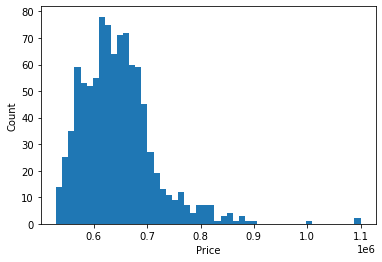

In [5]:
plt.hist(df['Sold_price'], bins = 50)
plt.xlabel('Price')
plt.ylabel('Count')
pd.set_option('float_format', '{:.2f}'.format)
print(df['Sold_price'].describe())

In [6]:
X = df.drop(columns = ['House_type', 'Exposure', 'heat', 'hydro', 'water', 'Sold_price'])
y = df['Sold_price']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Listing_price       957 non-null    int64  
 1   Bedroom             957 non-null    float64
 2   Washroom            957 non-null    int64  
 3   Parking             957 non-null    int64  
 4   Tax                 957 non-null    float64
 5   Maintenance         957 non-null    float64
 6   Size                957 non-null    float64
 7   Days_on_market      957 non-null    int64  
 8   x0_Condo Apt        957 non-null    float64
 9   x0_Condo Townhouse  957 non-null    float64
 10  x0_Detached         957 non-null    float64
 11  x0_Semi-Detached    957 non-null    float64
 12  x1_E                957 non-null    float64
 13  x1_N                957 non-null    float64
 14  x1_NE               957 non-null    float64
 15  x1_NW               957 non-null    float64
 16  x1_S    

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(669, 23)
(288, 23)
(669,)
(288,)


In [10]:
X_train.reset_index(inplace=True, drop = True)
X_test.reset_index(inplace=True, drop = True)
y_train.reset_index(inplace=True, drop = True)
y_test.reset_index(inplace=True, drop = True)

## 2.3 Pipeline--Modeling

1. Linear Regression
2. Ridge
3. Lasso
4. Random Forest
5. Decision Tree
6. XGBoost

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [13]:
print(X_train_ss.shape)
print(X_test_ss.shape)
print(y_train.shape)
print(y_test.shape)

(669, 23)
(288, 23)
(669,)
(288,)


In [14]:
# Adjusted R squared #2
def adj_r2(X_test_ss, r2_score):
    nrows = X_test_ss.shape[0]
    ncols = X_test_ss.shape[1]
    adj_r2 = 1-(((1-r2_score)*(nrows-1))/(nrows-ncols-1))
    
    return adj_r2

In [15]:
def visualize2D(mse_, r2score_, adj_r2score_, model):
    print(model, "-"*10)
    fig, (ax1, ax2 , ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
    ax1.plot(mse_)
    ax1.set_title(f'Index of the min MSE Score: {mse_.index(min(mse_))}')
    
    ax2.plot(r2score_)
    ax2.set_title(f"Index of the max R2 Score: {r2score_.index(max(r2score_))}")    
    
    ax3.plot(adj_r2score_)
    ax3.set_title(f"Index of the max Adj R2 Score: {adj_r2score_.index(max(adj_r2score_))}")  

In [16]:
# LR
steps = [('LinearRegression', LinearRegression(normalize=True))]

pipe = Pipeline(steps)
pipe.fit(X_train_ss, y_train)
y_pred = pipe.predict(X_test_ss)
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
adj_r2score = adj_r2(X_test_ss, r2score)

print('RMSE: $%.2f'%(np.sqrt(mse)))
print('R2 Score: %.3f'%(r2score))
print('R2 Score Adj: %.3f' %(adj_r2score))
print('-'*10)  

RMSE: $46818.70
R2 Score: 0.660
R2 Score Adj: 0.630
----------


Linear Regression
----------
RMSE: $46818.70
R2 Score: 0.660
R2 Score Adj: 0.630


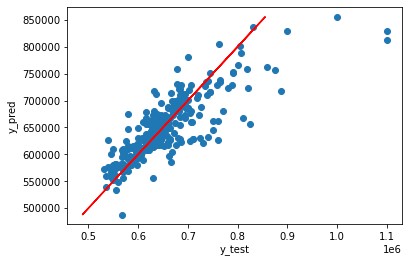

In [17]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, c = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')

print('Linear Regression')
print('-'*10)  
print('RMSE: $%.2f'%(np.sqrt(mse)))
print('R2 Score: %.3f'%(r2score))
print('R2 Score Adj: %.3f' %(adj_r2score))

### Ridge

In [18]:
mse_ = []
r2score_= []
adj_r2score_= []
alpha_ridge = [1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 1000, 10000]

for alpha in alpha_ridge:    
    steps = [('Ridge', Ridge(alpha = alpha, random_state=2021))]
    pipe = Pipeline(steps)
    pipe.fit(X_train_ss, y_train)
    y_pred = pipe.predict(X_test_ss)
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    adj_r2score = adj_r2(X_test_ss, r2score)
    
    mse_.append(mse)
    r2score_.append(r2score)
    adj_r2score_.append(adj_r2score)
    
    print(f'Ridge(alpha = {alpha})')
    print(f'MSE:{mse.round(2)}')
    print(f'RMSE:{np.sqrt(mse).round(2)}')
    print(f'R2 Score: {r2score.round(3)}')
    print(f'R2 Score Adj: {adj_r2score.round(3)}')
    print('-'*10)

Ridge(alpha = 1e-08)
MSE:2191990352.71
RMSE:46818.7
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Ridge(alpha = 0.0001)
MSE:2191990387.64
RMSE:46818.7
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Ridge(alpha = 0.001)
MSE:2191990702.07
RMSE:46818.7
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Ridge(alpha = 0.01)
MSE:2191993846.92
RMSE:46818.73
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Ridge(alpha = 1)
MSE:2192346013.91
RMSE:46822.49
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Ridge(alpha = 5)
MSE:2193891514.64
RMSE:46839.0
R2 Score: 0.659
R2 Score Adj: 0.63
----------
Ridge(alpha = 10)
MSE:2196086000.29
RMSE:46862.42
R2 Score: 0.659
R2 Score Adj: 0.629
----------
Ridge(alpha = 20)
MSE:2201270196.24
RMSE:46917.7
R2 Score: 0.658
R2 Score Adj: 0.629
----------
Ridge(alpha = 100)
MSE:2267710321.67
RMSE:47620.48
R2 Score: 0.648
R2 Score Adj: 0.617
----------
Ridge(alpha = 1000)
MSE:3211993128.15
RMSE:56674.45
R2 Score: 0.501
R2 Score Adj: 0.458
----------
Ridge(alpha = 10000)
MSE:55477632

Ridge ----------


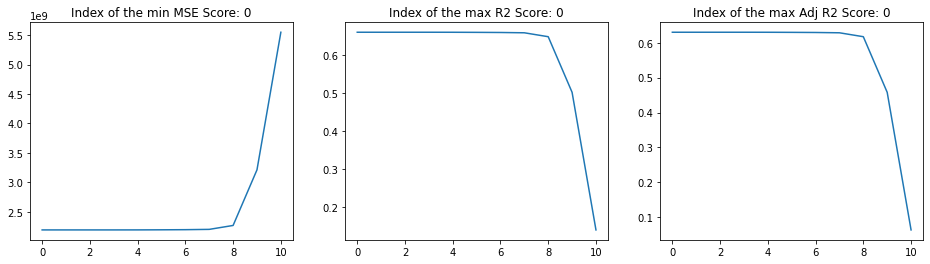

In [19]:
visualize2D(mse_, r2score_, adj_r2score_, 'Ridge')

In [20]:
# Ridge
steps = [('Ridge', Ridge(alpha = alpha_ridge[0]))]
pipe = Pipeline(steps)
pipe.fit(X_train_ss, y_train)
y_pred = pipe.predict(X_test_ss)
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
adj_r2score = adj_r2(X_test_ss, r2score)

print(f'MSE:{mse.round(2)}')
print(f'RMSE:{np.sqrt(mse).round(2)}')
print(f'R2 Score: {r2score.round(3)}')
print(f'R2 Score Adj: {adj_r2score.round(3)}')
print('-'*10)

MSE:2191990352.71
RMSE:46818.7
R2 Score: 0.66
R2 Score Adj: 0.63
----------


### Lasso

In [21]:
mse_ = []
r2score_= []
adj_r2score_= []
alpha_lasso = [1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

for alpha in alpha_lasso:    
    steps = [('Lasso', Lasso(alpha = alpha, random_state=2021))]
    pipe = Pipeline(steps)
    pipe.fit(X_train_ss, y_train)
    y_pred = pipe.predict(X_test_ss)
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    adj_r2score = adj_r2(X_test_ss, r2score)
    
    mse_.append(mse)
    r2score_.append(r2score)
    adj_r2score_.append(adj_r2score)
    
    print(f'Lasso(alpha = {alpha})')
    print(f'MSE:{mse.round(2)}')
    print(f'RMSE:{np.sqrt(mse).round(2)}')
    print(f'R2 Score: {r2score.round(3)}')
    print(f'R2 Score Adj: {adj_r2score.round(3)}')
    print('-'*10)

Lasso(alpha = 1e-08)
MSE:2191990352.71
RMSE:46818.7
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Lasso(alpha = 0.0001)
MSE:2191990346.45
RMSE:46818.7
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Lasso(alpha = 0.001)
MSE:2191990290.19
RMSE:46818.7
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Lasso(alpha = 0.01)
MSE:2191989727.59
RMSE:46818.69
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Lasso(alpha = 1)
MSE:2192105088.16
RMSE:46819.92
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Lasso(alpha = 5)
MSE:2192633574.29
RMSE:46825.57
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Lasso(alpha = 10)
MSE:2193278638.56
RMSE:46832.45
R2 Score: 0.66
R2 Score Adj: 0.63
----------
Lasso(alpha = 20)
MSE:2194603702.88
RMSE:46846.6
R2 Score: 0.659
R2 Score Adj: 0.63
----------


C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1232976832.3549805, tolerance: 257141879.74764332
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1228679335.1866455, tolerance: 257141879.74764332
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1228687925.2089844, tolerance: 257141879.74764332
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Con

Lasso ----------


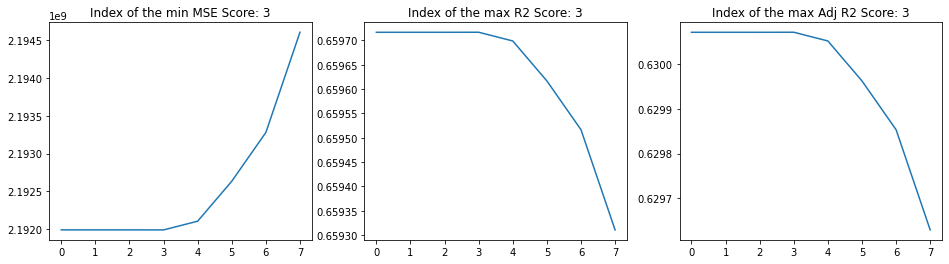

In [22]:
visualize2D(mse_, r2score_, adj_r2score_, 'Lasso')

In [23]:
# Lasso
steps = [('Lasso', Lasso(alpha = alpha_lasso[3]))]
pipe = Pipeline(steps)
pipe.fit(X_train_ss, y_train)
y_pred = pipe.predict(X_test_ss)

mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
adj_r2score = adj_r2(X_test_ss, r2score)

print(f'lasso_alpha:{alpha_lasso[3]}')
print(f'MSE:{mse.round(2)}')
print(f'RMSE:{np.sqrt(mse).round(2)}')
print(f'R2 Score: {r2score.round(3)}')
print(f'R2 Score Adj: {adj_r2score.round(3)}')

print('-'*10)

lasso_alpha:0.01
MSE:2191989727.59
RMSE:46818.69
R2 Score: 0.66
R2 Score Adj: 0.63
----------


C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1228780159.9388428, tolerance: 257141879.74764332
  model = cd_fast.enet_coordinate_descent(


## Regression Model Assumptions Check

### Linearity Check
#### Residual Plot

In [24]:
residuals = y_test-y_pred

In [25]:
residuals.shape

(288,)

In [26]:
# Find best line of fit
m, b = np.polyfit(x=y_pred, y=residuals, deg=1)

y= 0.1442*x + -90276.81


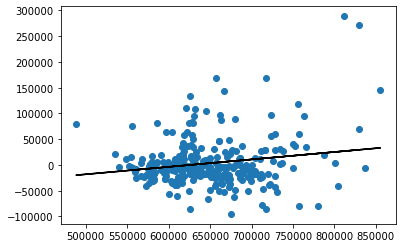

In [27]:
plt.scatter(y_pred, residuals)
plt.plot(y_pred, m*y_pred+b, color = 'black',)
print(f'y= {m.round(4)}*x + {b.round(2)}')

#### QQplot

In [28]:
import statsmodels.api as sm

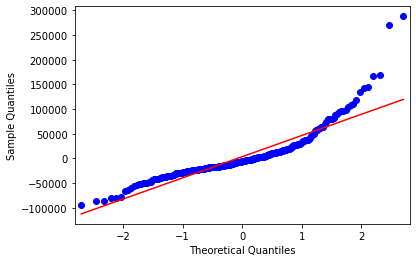

In [29]:
fig = sm.qqplot(residuals, line="r")

<AxesSubplot:xlabel='Sold_price', ylabel='Count'>

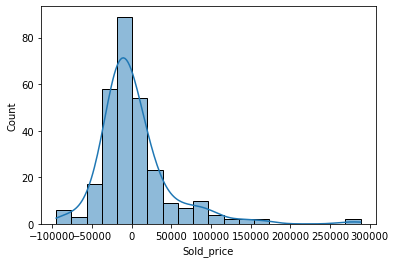

In [30]:
import seaborn as sns
sns.histplot(residuals, bins=20, kde=True)

In [31]:
classifier = pipe.named_steps['Lasso']
print(f'Coefficients:{classifier.coef_}')

Coefficients:[ 32859.73129574   8982.22133914   2979.88365858   7563.12108323
  10052.36022274  -7195.42267026   6793.09865559 -13388.53076625
  -5748.11333811  -3330.12196224   6379.87376292   -255.02496333
   1361.35454612   -755.34538433   3449.45415302     40.62057168
   2995.56793552  -1012.95261608   -449.07274743  -1545.45294669
   -700.88159911  -2892.03829528   2421.9251244 ]


In [32]:
len(classifier.coef_)

23

In [33]:
coefficients = pd.DataFrame(classifier.coef_, index = X_test.columns)

In [34]:
coefficients

,0
Listing_price,32859.73
Bedroom,8982.22
Washroom,2979.88
Parking,7563.12
Tax,10052.36
Maintenance,-7195.42
Size,6793.10
Days_on_market,-13388.53
x0_Condo Apt,-5748.11
x0_Condo Townhouse,-3330.12


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Listing_price'),
  Text(1, 0, 'Tax'),
  Text(2, 0, 'Bedroom'),
  Text(3, 0, 'Parking'),
  Text(4, 0, 'Size'),
  Text(5, 0, 'x0_Detached'),
  Text(6, 0, 'x1_NE'),
  Text(7, 0, 'x1_S'),
  Text(8, 0, 'Washroom'),
  Text(9, 0, 'x4_1_water'),
  Text(10, 0, 'x1_E'),
  Text(11, 0, 'x1_NW'),
  Text(12, 0, 'x0_Semi-Detached'),
  Text(13, 0, 'x1_SW'),
  Text(14, 0, 'x2_1_heat'),
  Text(15, 0, 'x1_N'),
  Text(16, 0, 'x1_SE'),
  Text(17, 0, 'x1_W'),
  Text(18, 0, 'x3_1_hydro'),
  Text(19, 0, 'x0_Condo Townhouse'),
  Text(20, 0, 'x0_Condo Apt'),
  Text(21, 0, 'Maintenance'),
  Text(22, 0, 'Days_on_market')])

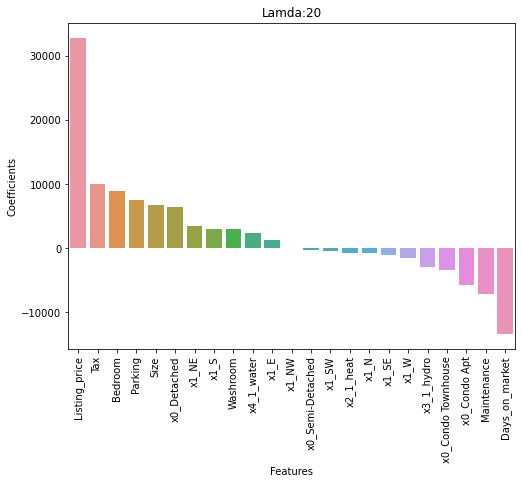

In [35]:
coefficients_matrix = coefficients.T
data = coefficients_matrix.sort_values(by = 0, axis = 1 ,ascending=False)

plt.subplots(figsize=(8, 6))
sns.barplot(data=data).set(xlabel='Features', ylabel='Coefficients', title = 'Lamda:%d'%alpha)
plt.xticks(rotation=90)

### If not linear, 
#### PolynomialFeatures

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = Pipeline([('poly', PolynomialFeatures(degree=2)), ('Lasso', Lasso())])
poly.fit(X_train_ss, y_train)
y_pred = poly.predict(X_test_ss)
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
adj_r2score = adj_r2(X_test_ss, r2score)

print(f'MSE:{mse}')
print(f'R2 Score: {r2score}')
print(f'R2 Score Adj: {adj_r2score}')
print('-'*10)

MSE:3026398723.7780657
R2 Score: 0.5301833092624642
R2 Score Adj: 0.4892523096906334
----------


C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108136427765.56233, tolerance: 257141879.74764332
  model = cd_fast.enet_coordinate_descent(


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
import xgboost as xgb

In [41]:
models = [
    LinearRegression(),
    Ridge(alpha = 20, random_state=2021),
    Lasso(alpha = 1e-8, random_state=2021),
    DecisionTreeRegressor(max_depth = 4, random_state=2021),
    RandomForestRegressor(n_estimators = 74, random_state = 2021),
    GradientBoostingRegressor(random_state = 2021),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.1,
                max_depth = 2, n_estimators = 90, alpha= 0.5, random_state=2021),
    AdaBoostRegressor(learning_rate = 0.03, n_estimators= 200, random_state = 2021),
]

In [42]:
scores = []
model_names = []

for model in models:
    steps = [('model', model)]
    pipe=Pipeline(steps)
    
    pipe.fit(X_train_ss, y_train)
    score = pipe.score(X_test_ss, y_test)
    model_names.append(str(model))
    scores.append(score)
    
    print(f'{model}')
    print("model score: %.3f" % score)
    print('----')

LinearRegression()
model score: 0.703
----
Ridge(alpha=20, random_state=2021)
model score: 0.706
----
Lasso(alpha=1e-08, random_state=2021)
model score: 0.703
----
DecisionTreeRegressor(max_depth=4, random_state=2021)
model score: 0.582
----
RandomForestRegressor(n_estimators=74, random_state=2021)
model score: 0.756
----


C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21592771334.46588, tolerance: 226745026.52844366
  model = cd_fast.enet_coordinate_descent(


GradientBoostingRegressor(random_state=2021)
model score: 0.751
----
XGBRegressor(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=12, num_parallel_tree=1, random_state=2021,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.758
----
AdaBoostRegressor(learning_rate=0.03, n_estimators=200, random_state=2021)
model score: 0.706
----


In [43]:
[model.split('(')[0] for model in model_names]

['LinearRegression',
 'Ridge',
 'Lasso',
 'DecisionTreeRegressor',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'XGBRegressor',
 'AdaBoostRegressor']

In [44]:
model_summary = pd.DataFrame({'model': [model.split('(')[0] for model in model_names], 
              'score': scores,
            'params': [model.split('(')[1].split(')')[0] for model in model_names]
             }
            )

In [45]:
model_summary.sort_values('score', ascending=False).reset_index(drop=True)

,model,score,params
0,XGBRegressor,0.76,"alpha=0.5, base_score=0.5, booster='gbtree', c..."
1,RandomForestRegressor,0.76,"n_estimators=74, random_state=2021"
2,GradientBoostingRegressor,0.75,random_state=2021
3,Ridge,0.71,"alpha=20, random_state=2021"
4,AdaBoostRegressor,0.71,"learning_rate=0.03, n_estimators=200, random_s..."
5,Lasso,0.70,"alpha=1e-08, random_state=2021"
6,LinearRegression,0.70,
7,DecisionTreeRegressor,0.58,"max_depth=4, random_state=2021"
